#Employment data EDA

---



In [ ]:
df = pd.read_excel('train.xlsx')

In [ ]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [ ]:
df.shape

(3998, 39)

In [ ]:
#to check if data has null values
df.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

Data seems to be clean

Task: check for gender bias

In [ ]:
df.Gender.unique()

array(['f', 'm'], dtype=object)

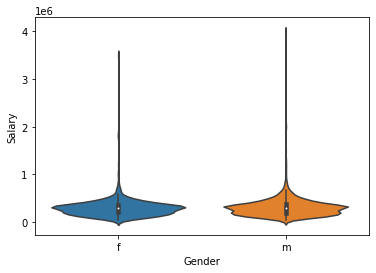

In [ ]:
sns.violinplot(x='Gender', y= 'Salary', data = df)

Not that conclusive. Let's look at some numbers for both genders now

In [ ]:
df[['10percentage','12percentage', 'collegeGPA', 'Gender']].groupby('Gender').mean()

,10percentage,12percentage,collegeGPA
Gender,,,
f,80.932894,77.007618,74.048056
m,76.979000,73.666636,70.679947


In [ ]:
df[['10percentage','12percentage', 'collegeGPA', 'Gender']].groupby('Gender').median()

,10percentage,12percentage,collegeGPA
Gender,,,
f,82.4,77.0,74.00
m,78.0,73.4,70.66


So females are doing much better in academics

In [ ]:
df[['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', 'Gender']].groupby('Gender').mean()

,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
Gender,,,,,
f,0.121034,0.292444,0.012173,-0.179358,0.038246
m,-0.087826,0.100566,-0.000198,-0.165783,-0.193609


In [ ]:
df[['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', 'Gender']].groupby('Gender').median()

,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
Gender,,,,,
f,0.2718,0.3789,0.0914,-0.23440,0.0973
m,-0.0154,0.2124,0.0914,-0.17277,-0.0943


So we get a clear idea that females are doing much better on the Big Five personality traits too. 

In [ ]:
df[['Salary', 'Gender']].groupby('Gender').mean()

,Salary
Gender,
f,294937.304075
m,311716.211772


The salary clearly concludes there is a bias but the analysis will not be completed until we consider other variables

Like it may be the case that for males there exist more number of extreme outliers i.e. the men who earn more are much higher than the average

Let us consider the mean and median for higher bracket salary males and females

In [ ]:
df.Salary.mean()

307699.8499249625

In [ ]:
df.Salary.std()

212737.4999568574

In [ ]:
#we define threshold as one standard deviation above the mean
threshold = df.Salary.mean() + df.Salary.std()

In [ ]:
#This additional col will tell if a person belongs to higher salary bracket
df['HighBracket'] = (df.Salary>threshold)

In [ ]:
df.sample(10)

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,HighBracket
630,train,205705,500000,2011-09-01,present,systems engineer,Kolkata,f,1989-04-26,68.00,0,2007,65.0,0,5508,2,B.Tech/B.E.,information technology,74.00,5508,0,Orissa,2011,535,445,525,0.342315,365,-1,-1,-1,-1,-1,-1,-0.4173,0.3448,0.6720,1.5899,-0.1295,False
682,train,353167,200000,2014-09-01,present,junior engineer,Bangalore,m,1990-08-01,81.60,kseeb,2008,57.8,karnataka pre university board,1436,2,B.Tech/B.E.,electronics and communication engineering,65.30,1436,0,Karnataka,2012,465,334,485,0.058793,-1,200,-1,-1,-1,-1,-1,-2.2720,-0.5523,-1.9042,1.0024,-0.7615,False
2443,train,1259589,110000,2014-10-01,2015-04-01 00:00:00,get,kharagpur,m,1993-03-18,80.00,icse,2010,76.0,icse,11210,2,B.Tech/B.E.,mechanical engineering,80.60,11210,0,Chhattisgarh,2014,735,555,535,0.328746,-1,-1,-1,346,-1,-1,-1,-0.4463,-0.9531,0.1637,0.0192,-2.0105,False
2147,train,795771,310000,2014-06-01,2015-04-01 00:00:00,programmer analyst,-1,m,1991-10-18,93.30,icse,2010,93.5,isc,222,2,B.Tech/B.E.,industrial & production engineering,84.00,222,0,Jharkhand,2015,675,630,590,0.903941,485,-1,-1,500,-1,-1,-1,0.4155,1.3779,0.4711,-0.7415,1.0554,False
1830,train,1129543,155000,2014-04-01,present,java developer,Kochi/Cochin,m,1990-01-26,64.00,state board,2007,60.0,state board,4866,2,MCA,computer application,77.00,4866,0,Tamil Nadu,2013,385,410,330,0.080055,355,-1,253,-1,-1,-1,-1,-0.8772,-0.1206,1.3933,0.3995,0.2889,False
3340,train,947534,310000,2014-10-01,2015-05-01 00:00:00,java software engineer,Bangalore,m,1992-11-30,87.52,state board,2010,74.5,state board,314,2,B.Tech/B.E.,computer science & engineering,72.78,314,1,Karnataka,2014,580,475,270,0.744758,475,-1,438,-1,-1,-1,-1,1.4208,0.5454,0.6248,-2.1360,0.4805,False
2777,train,748099,150000,2014-07-01,2015-03-01 00:00:00,process engineer,Bangalore,m,1991-01-25,80.60,cbse,2009,84.0,cbse,6904,2,B.Tech/B.E.,electronics and electrical engineering,71.00,6904,1,Tamil Nadu,2013,585,610,525,0.684565,335,-1,-1,-1,452,-1,-1,-0.3027,-1.6191,-0.6048,0.0192,-1.6273,False
2076,train,687992,180000,2013-12-01,2015-01-01 00:00:00,customer support engineer,Bangalore,m,1991-06-15,55.60,state board,2009,56.2,state board,1638,2,B.Tech/B.E.,electronics engineering,65.90,1638,0,Uttar Pradesh,2013,380,520,500,0.824666,-1,400,-1,-1,-1,-1,-1,-1.8825,-3.4506,-2.1418,0.7798,-2.9686,False
160,train,211700,225000,2011-11-01,2013-04-01 00:00:00,quality analyst,Gurgaon,f,1989-10-08,72.00,cbse,2007,69.0,cbse,378,2,B.Tech/B.E.,computer engineering,72.00,378,0,Haryana,2011,505,345,365,0.342315,365,-1,-1,-1,-1,-1,-1,0.5100,0.1888,0.2366,-0.4078,0.5024,False
3743,train,63887,395000,2011-11-01,present,senior software engineer,-1,m,1985-05-11,49.90,up board,2002,56.1,up board,893,2,B.Tech/B.E.,computer engineering,66.26,893,0,Uttar Pradesh,2010,495,475,595,0.670743,455,-1,-1,-1,-1,-1,-1,0.8192,1.1248,0.6720,0.0623,1.1343,False


In [ ]:
df[['Salary','HighBracket', 'Gender']].groupby(['HighBracket','Gender']).mean()

Salary
HighBracket Gender               
False       f       271499.454744
            m       272598.433606
True        f       832250.000000
            m       785344.827586

We notice that females above the higher income bracket have a mean salary much higher than males

The bias then may be due to higher number of male data in the dataset

In [ ]:
df[['Salary','HighBracket', 'Gender']].groupby(['HighBracket','Gender']).count()

Salary
HighBracket Gender        
False       f          917
            m         2809
True        f           40
            m          232

Calculating the percentage of females in both income groups

In [ ]:
print('Lower bracket female population:', 917/(2809+917)*100)
print('Higher bracket female population:', 40/(40+232)*100)

Lower bracket female population: 24.610842726784757
Higher bracket female population: 14.705882352941178


Lower mean salary may be due to the fact here that the number of females rising up the ranks drops significantly

We may consider other factors like college tier.

In [ ]:
df.CollegeTier.unique()

array([2, 1])

In [ ]:
df[['CollegeTier', 'HighBracket', 'Salary']].groupby(['HighBracket', 'CollegeTier']).count()

Salary
HighBracket CollegeTier        
False       1               234
            2              3492
True        1                63
            2               209

In [ ]:
print('Percentage of people in Higher bracket from tier 2 colleges:', 209/(63+209)*100)
print('Percentage of people in Lower bracket from tier 2 colleges:', 3492/(3492+234)*100)

Percentage of people in Higher bracket from tier 2 colleges: 76.83823529411765
Percentage of people in Lower bracket from tier 2 colleges: 93.71980676328504


Lets see how many women go to tier 1 colleges where you have more chance of ending up in a high paying job.

Note: data here seems to be dominated by tier 2 colleges so the percentage for them is higher

In [ ]:
df[['CollegeTier','Gender','Salary']].groupby(['CollegeTier', 'Gender']).count()

Salary
CollegeTier Gender        
1           f           51
            m          246
2           f          906
            m         2795